In [ ]:
import numpy as np
from collections import defaultdict
import re
import matplotlib.pyplot as plt

def readTranscripts(fpath):
    with open(fpath, 'r') as f:
        fcontent = f.read()
    transcripts = re.split(r'>[ -~]*\n', fcontent)
    transcripts.pop(0)
    transcripts = [t.strip().replace('\n', '') for t in transcripts]
    return transcripts

def extractKmers(transcripts, k):
    kmers = defaultdict(int)
    transcripts = [t.upper() for t in transcripts]
    for t in transcripts:
        transcrKmers = np.array([t[i:i+k] for i in range(0, len(t)-k+1)])
        uniqueTranscrKmers = np.unique(transcrKmers, return_counts=True)
        for i in range(len(uniqueTranscrKmers[0])):
            kmers[uniqueTranscrKmers[0][i]] += uniqueTranscrKmers[1][i]
    return kmers


num transcripts: 6478


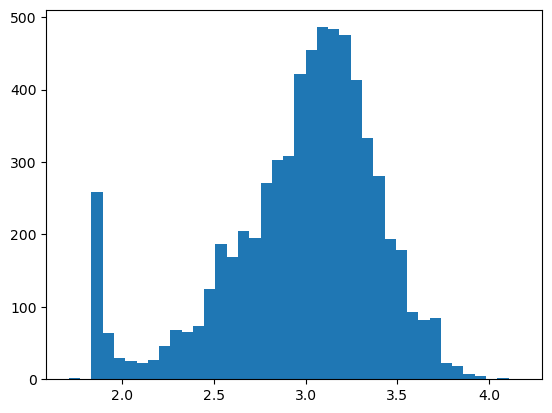

In [ ]:
fpath = '../Data/Saccharomyces_RefGenome_R64/NCBI_RefSeq_Assembly/transcripts_gffread.fa'

transcripts = readTranscripts(fpath)
print(f'num transcripts: {len(transcripts)}')
lengths_transcr = [np.log10(len(t)) for t in transcripts]
#print(np.unique(lengths_transcr, return_counts=True))
plt.hist(lengths_transcr, bins=40)
#plt.xscale('log')
plt.show()

In [ ]:
kmer_counts_unique = []
kmer_counts_nonunique = []
for k in [9]:#[1, 2, 3, 9, 10, 15, 20, 30]:
    print(f'k={k}')
    kmers = extractKmers(transcripts, k)

    num_unique_kmers = len(kmers)
    num_nonunique_kmers = sum(list(kmers.values()))
    kmer_counts_unique.append(num_unique_kmers)
    kmer_counts_nonunique.append(num_nonunique_kmers)


k=9
AAACCTACC 71
AAAGAGTCA 122
AAAGCCAGC 46
AAATTAACT 107
AACCACCAC 66
AACCTACCC 29
AACTACGGT 46
AACTGAAAC 93
AACTTCAAT 147
AACTTGGTG 75
AAGAGTCAA 112
AAGCCAGCC 36
AAGCCGCCC 16
AAGCCGTTT 50
AAGGACGGT 68
AAGTGACCA 84
AAGTTGCTG 82
AATACTACA 107
AATCGCCGC 14
AATCTGACG 41
261492
(array([9]), array([261492]))


[4, 16, 64, 261492, 982725, 8180600, 8309324, 8275948]
[8946550, 8940072, 8933594, 8894726, 8888248, 8855858, 8823468, 8758688]


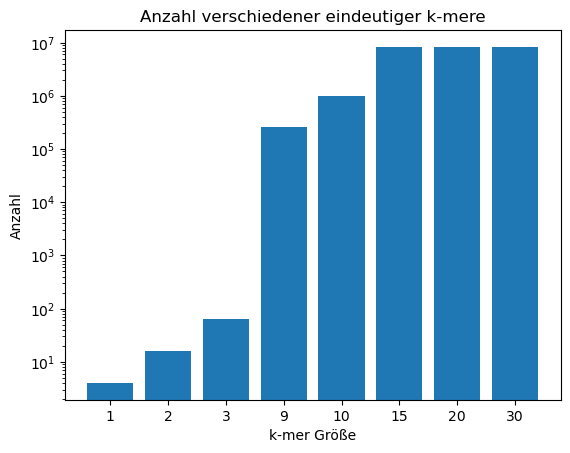

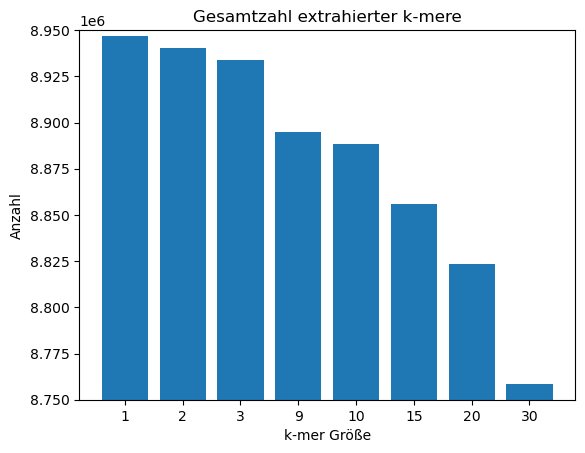

In [28]:
x = [str(i) for i in [1, 2, 3, 9, 10, 15, 20, 30]]
print(kmer_counts_unique)
print(kmer_counts_nonunique)
plt.bar(x, kmer_counts_unique)
plt.yscale('log')
plt.xlabel('k-mer Größe')
plt.ylabel('Anzahl')
plt.title('Anzahl verschiedener eindeutiger k-mere')
plt.savefig('kmer_counts_unique.png')
plt.show()
plt.bar(x, kmer_counts_nonunique)
plt.ylim(8750000, 8950000)
plt.xlabel('k-mer Größe')
plt.ylabel('Anzahl')
plt.title('Gesamtzahl extrahierter k-mere')
plt.savefig('kmer_counts_nonunique.png')
plt.show()

In [ ]:
k=10
tr = ['11111211111']
for t in tr:
    print(np.array([t[i:i+k] for i in range(0, (len(t)-k)+1)]))


['1111121111' '1111211111']
